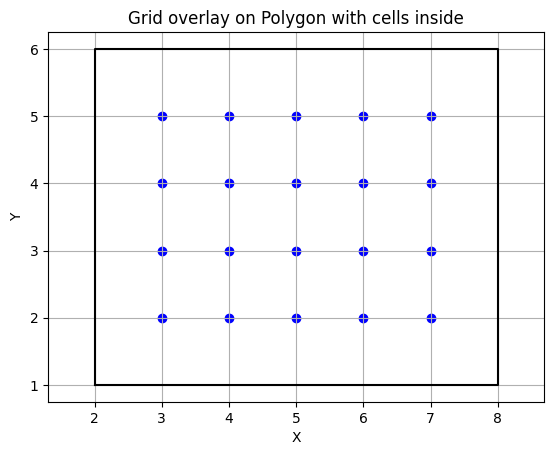

In [1]:
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt

def overlay_grid_on_polygon(polygon, cell_size):
    # Get bounding box of polygon
    min_x, min_y, max_x, max_y = polygon.bounds

    # Generate grid points within bounding box
    grid_points = []
    x = min_x
    while x <= max_x:
        y = min_y
        while y <= max_y:
            grid_points.append(Point(x, y))
            y += cell_size
        x += cell_size

    # Identify grid cells inside the polygon
    cells_inside_polygon = []
    for point in grid_points:
        if polygon.contains(point):
            cells_inside_polygon.append(point)

    return cells_inside_polygon

# Example polygon coordinates (clockwise order)
polygon_coords = [(2, 1), (8, 1), (8, 6), (2, 6)]

# Create Shapely Polygon object
polygon = Polygon(polygon_coords)

# Define cell size
cell_size = 1

# Overlay grid and identify cells inside polygon
cells_inside_polygon = overlay_grid_on_polygon(polygon, cell_size)

# Plotting
x, y = polygon.exterior.xy
plt.plot(x, y, color='black')  # Plot polygon

# Plot grid points
for cell in cells_inside_polygon:
    plt.scatter(cell.x, cell.y, color='blue')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Grid overlay on Polygon with cells inside')
plt.grid(True)
plt.axis('equal')
plt.show()

In [1]:
import numpy as np

def generate_points_within_square(square):
    points_within_squares = []
    for sq in square:
        min_x, min_y = np.min(sq, axis=0)
        max_x, max_y = np.max(sq, axis=0)
        points_within_square = [(x, y) for x in range(int(min_x), int(max_x) + 1) for y in range(int(min_y), int(max_y) + 1)]
        points_within_squares.append(points_within_square)
    return points_within_squares

# Example 2D numpy array representing squares
squares = np.array([[[1, 1], [4, 1], [4, 4], [1, 4]],
                    [[5, 5], [8, 5], [8, 8], [5, 8]]])

points_within_squares = generate_points_within_square(squares)
print("Points within the squares:")
for i, square_points in enumerate(points_within_squares):
    print(f"Square {i + 1}: {square_points}")

Points within the squares:
Square 1: [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4)]
Square 2: [(5, 5), (5, 6), (5, 7), (5, 8), (6, 5), (6, 6), (6, 7), (6, 8), (7, 5), (7, 6), (7, 7), (7, 8), (8, 5), (8, 6), (8, 7), (8, 8)]


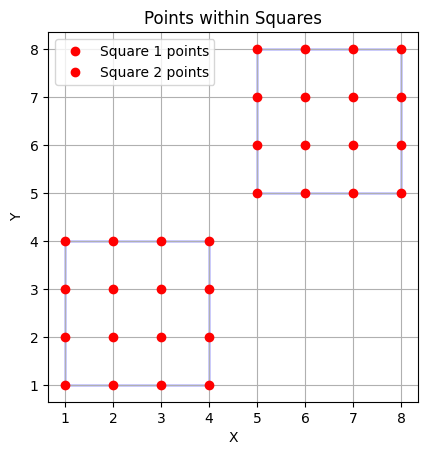

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_points_within_square(square):
    points_within_squares = []
    for sq in square:
        min_x, min_y = np.min(sq, axis=0)
        max_x, max_y = np.max(sq, axis=0)
        points_within_square = [(x, y) for x in range(int(min_x), int(max_x) + 1) for y in range(int(min_y), int(max_y) + 1)]
        points_within_squares.append(points_within_square)
    return points_within_squares

# Example 2D numpy array representing squares
squares = np.array([[[1, 1], [4, 1], [4, 4], [1, 4]],
                    [[5, 5], [8, 5], [8, 8], [5, 8]]])

# Generate points within squares
points_within_squares = generate_points_within_square(squares)

# Plotting
fig, ax = plt.subplots()

# Plot squares
for sq in squares:
    square = plt.Polygon(sq, fill=None, edgecolor='blue')
    ax.add_patch(square)

# Plot points within squares
for i, square_points in enumerate(points_within_squares):
    xs, ys = zip(*square_points)
    ax.plot(xs, ys, 'ro', label=f'Square {i + 1} points')

ax.set_aspect('equal', 'box')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Points within Squares')
ax.legend()
plt.grid(True)
plt.show()